# Import packages and add function files to system path

In [1]:
import sys, os
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('classifiers'))))

# Specify constants

In [2]:
# Set file path to raw accelerometer data (.CSV file, unit=G's, headers = ['ts','x','y','z'])
raw_data_filepath = 'sample_wrist_accelerometer_data.csv'
# Specify raw data sampling rate (float)
raw_data_sampling_rate = 100.

# Load Raw Data

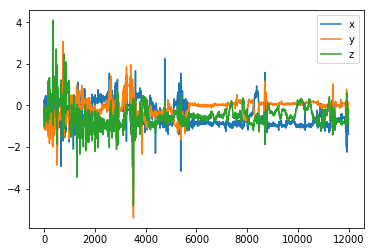

In [9]:
# Load raw data into Pandas DataFrame
raw_data_df = pd.read_csv(raw_data_filepath, nrows=raw_data_sampling_rate*120) # Running code on 1 minute of data for demo purposes
raw_data_df.head()

# Plot data
from matplotlib import pyplot as plt
raw_data_df.plot()
plt.show()

# Gait ML Model

## Extract features for gait model

In [10]:
from classifiers import gait_classifier
from classifiers import constants
# Build feature set in 3 second windows for Gait classification
gait_classifier_feature_set = gait_classifier.build_gait_classification_feature_set(raw_data_df, raw_data_sampling_rate)

# Trim calculated features to ones determined from feature selection
gait_classifier_feature_set = gait_classifier_feature_set[constants.GAIT_FEATURE_SELECTION]
gait_classifier_feature_set.head()

,"x_bp_filt_[0.25, 3.0]_signal_entropy","x_bp_filt_[0.25, 3.0]_y_bp_filt_[0.25, 3.0]_corr_coef","x_bp_filt_[0.25, 3.0]_z_bp_filt_[0.25, 3.0]_corr_coef","y_bp_filt_[0.25, 3.0]_z_bp_filt_[0.25, 3.0]_corr_coef","x_bp_filt_[0.25, 3.0]_rms","y_bp_filt_[0.25, 3.0]_rms","z_bp_filt_[0.25, 3.0]_rms","x_bp_filt_[0.25, 3.0]_range","y_bp_filt_[0.25, 3.0]_range","z_bp_filt_[0.25, 3.0]_range",...,"y_bp_filt_[0.25, 3.0]_spectral_flatness","y_bp_filt_[0.25, 3.0]_spectral_entropy","z_bp_filt_[0.25, 3.0]_dom_freq_value","z_bp_filt_[0.25, 3.0]_dom_freq_magnitude","z_bp_filt_[0.25, 3.0]_spectral_flatness","z_bp_filt_[0.25, 3.0]_spectral_entropy","PC1_[0.25, 3.0]_dom_freq_value","x_bp_filt_[0.25, 3.0]_mean_cross_rate","y_bp_filt_[0.25, 3.0]_mean_cross_rate","z_bp_filt_[0.25, 3.0]_mean_cross_rate"
0,2.741457,0.011239,0.466415,0.075455,0.141720,0.100563,0.256357,0.593037,0.487984,0.984747,...,-11.406831,0.570105,0.390625,0.354234,-14.098914,0.502229,0.390625,0.013333,0.046667,0.006667
1,1.477732,0.180066,0.361380,0.515227,0.310504,0.221593,0.248662,1.146375,1.259789,1.174448,...,-11.579113,0.676098,0.195312,0.208516,-12.052826,0.643513,0.390625,0.006667,0.063333,0.026667
2,3.132946,0.206627,-0.037349,-0.474401,0.200870,0.167502,0.317199,0.990109,0.684877,1.012249,...,-11.357652,0.564068,0.390625,0.438228,-16.856855,0.347882,0.585938,0.036667,0.026667,0.013333
3,1.287068,0.450575,-0.387845,-0.648580,0.229170,0.297565,0.424799,0.768445,1.171962,1.492442,...,-18.193390,0.493779,0.390625,0.435065,-16.643869,0.463852,0.390625,0.016667,0.023333,0.013333
4,3.061906,0.172157,0.040090,0.106814,0.302633,0.247007,0.215694,1.161651,1.076629,1.017303,...,-15.599022,0.475063,1.367188,0.251816,-11.858902,0.612339,0.390625,0.013333,0.020000,0.026667


## Initialize gait classification model

In [11]:
# Initialize model for training (Untrained Model)
gait_model = gait_classifier.initialize_model()
gait_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Resting Tremor ML Model

## Extract features for resting tremor model

In [12]:
from classifiers import resting_tremor_classifier

# Build feature set in 3 second windows for resting tremor classification
tremor_classifier_feature_set = resting_tremor_classifier.build_rest_tremor_classification_feature_set(raw_data_df, raw_data_sampling_rate)
tremor_classifier_feature_set.head()

# Trim calculated features to ones determined from feature selection
tremor_classifier_feature_set = tremor_classifier_feature_set[constants.TREMOR_FEATURE_SELECTION]
tremor_classifier_feature_set.head()

,"x_bp_filt_[0.25, 3.5]_range","z_bp_filt_[3.5, 7.5]_rms","x_bp_filt_[0.25, 3.5]_rms","PC1_[3.5, 7.5]_rms","y_bp_filt_[3.5, 7.5]_spectral_flatness","y_bp_filt_[3.5, 7.5]_spectral_entropy","z_bp_filt_[3.5, 7.5]_spectral_entropy","x_bp_filt_[0.25, 3.5]_spectral_flatness","x_bp_filt_[0.25, 3.5]_spectral_entropy","y_bp_filt_[0.25, 3.5]_spectral_flatness","z_bp_filt_[0.25, 3.5]_dom_freq_value","z_bp_filt_[0.25, 3.5]_spectral_flatness","PC1_[3.5, 7.5]_spectral_entropy","PC1_[0.25, 3.5]_dom_freq_value","PC1_[0.25, 3.5]_spectral_flatness","x_bp_filt_[3.5, 7.5]_signal_entropy","y_bp_filt_[0.25, 3.5]_signal_entropy","z_bp_filt_[0.25, 3.5]_signal_entropy"
0,0.616158,0.128642,0.143968,0.125507,-6.507597,0.703712,0.740232,-12.968265,0.557542,-9.870229,0.390625,-12.818774,0.747275,0.390625,-12.441173,5.097437,4.298056,1.210843
1,1.189517,0.251191,0.312328,0.253560,-7.535671,0.739126,0.702784,-16.876019,0.434671,-10.207491,0.195312,-10.803090,0.707009,0.390625,-11.704112,3.801229,1.953074,5.049593
2,1.084730,0.097036,0.206868,0.095977,-5.404262,0.848510,0.752831,-11.344323,0.625648,-9.591438,0.390625,-15.805086,0.756254,0.585938,-15.776606,2.687391,2.758894,0.789207
3,0.799848,0.088024,0.230946,0.091409,-6.206900,0.790694,0.798732,-13.053697,0.536582,-16.799612,0.390625,-15.879248,0.789869,0.390625,-17.098345,4.868889,2.474045,0.997694
4,1.203185,0.152753,0.306229,0.152075,-7.547324,0.718677,0.737132,-13.681340,0.515729,-14.534434,1.367188,-11.503966,0.735459,0.390625,-11.779819,4.855701,2.764880,4.202279


## Initialize resting tremor classification model

In [13]:
# Initialize model for training (Untrained Model)
resting_tremor_model = resting_tremor_classifier.initialize_model()
resting_tremor_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Get hand movement predictions from heuristic hand movement classifier

In [14]:
from classifiers import hand_movement_classifier

# Compute hand movement predictions in 3 second windows
hand_movement_predictions = hand_movement_classifier.detect_hand_movement(raw_data_df, raw_data_sampling_rate)
hand_movement_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1.])

# Get resting tremor amplitude predictions from heuristic rest tremor amplitude classifier

In [ ]:
from classifiers import resting_tremor_amplitude_classifier

# Get hand movement features predictions (hand movement amplitude & smoothness of hand movement) 

In [13]:
from classifiers import hand_movement_features

# Organize predictions for given data file into one pandas DataFrame

In [14]:
from endpoints import filter_classifier_predictions

# Compute aggregate resting tremor endpoints

In [15]:
from endpoints import resting_tremor_endpoints

# Compute aggregate bradykinesia endpoints

In [16]:
from endpoints import bradykinesia_endpoints